In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
%pip install -q decorator==5.0.9
!pip install -q ipywidgets

import re
import imp
import json
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import normalize
import matplotlib.pyplot as plt
import networkx as nx
import seaborn as sns
from collections import Counter

import ipywidgets as widgets
from ipywidgets import interact, interact_manual

Note: you may need to restart the kernel to use updated packages.


In [3]:
%pip install -q cltk==1.0.22
%pip install -q strsim
%pip install -q leven

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [6]:
# importing local modules

import sys
sys.path.append('../src/')

import text_cleanup.text_cleanup as thesisCleanUp
import preprocessing.text_preprocessing as thesisTextPreprocessing
import data.reader as thesisDataReader
import utils.utils as thesisUtils
import features.tf_idf.n_gram as thesisTfIdfNgramFeatures
import features.count_vectorizer.n_gram as thesisCountVectorizerNgramFeatures
import similarities.cosine as thesisCosineSimilarities
import similarities.levenshtein as thesisLevenshteinSimilarities
import vocabulary.vocabulary as thesisVocabulary
import features.lexical as thesisLexicalFeatures
import similarities.cosine as thesisCosineSimilarity
import text_cleanup.text_cleanup as thesisTextCleanUp
import p_aligment.p_aligment as thesisPAligment

imp.reload(thesisLexicalFeatures)
imp.reload(thesisCosineSimilarity)
imp.reload(thesisCleanUp)
imp.reload(thesisTextPreprocessing)
imp.reload(thesisDataReader)
imp.reload(thesisUtils)
imp.reload(thesisTfIdfNgramFeatures)
imp.reload(thesisVocabulary)
imp.reload(thesisCosineSimilarities)
imp.reload(thesisTextCleanUp)
imp.reload(thesisCountVectorizerNgramFeatures)
imp.reload(thesisPAligment)
imp.reload(thesisLevenshteinSimilarities)

<module 'similarities.levenshtein' from '../src/similarities/levenshtein.py'>

# Inner levenshtein distance per p

In [14]:
l1 = [1,2,3]
l2 = del l1.copy()[1]

SyntaxError: invalid syntax (<ipython-input-14-e5f67519ad35>, line 2)

In [9]:
l1

[1, 2, 3]

In [10]:
l2

[1, 2, 3]

In [11]:
del l2[1]

In [12]:
l2

[1, 3]

In [13]:
l1

[1, 2, 3]

In [5]:
from similarity.normalized_levenshtein import NormalizedLevenshtein

normalized_levenshtein = NormalizedLevenshtein()
print(normalized_levenshtein.distance('My string', 'My $string'))
print(normalized_levenshtein.distance('My string', 'My $string'))
print(normalized_levenshtein.distance('My string', 'My $string'))

print(normalized_levenshtein.similarity('My string', 'My $string'))
print(normalized_levenshtein.similarity('My string', 'My $string'))
print(normalized_levenshtein.similarity('My string', 'My $string'))

0.1
0.1
0.1
0.9
0.9
0.9


In [7]:
thesisLevenshteinSimilarities.get_edit_distance('My string', 'My $string')

1

In [32]:
london_corpus = thesisDataReader.get_london_by_new_line()
zwickau_corpus = thesisDataReader.get_zwickau_by_new_line()
breslau_corpus = thesisDataReader.get_breslau_by_new_line()

In [16]:
london_inner_levenshtein_distance = thesisLevenshteinSimilarities.get_inner_version_best_similarities(thesisDataReader.get_london_by_new_line())
zwickau_inner_levenshtein_distance = thesisLevenshteinSimilarities.get_inner_version_best_similarities(thesisDataReader.get_zwickau_by_new_line())
breslau_inner_levenshtein_distance = thesisLevenshteinSimilarities.get_inner_version_best_similarities(thesisDataReader.get_breslau_by_new_line())

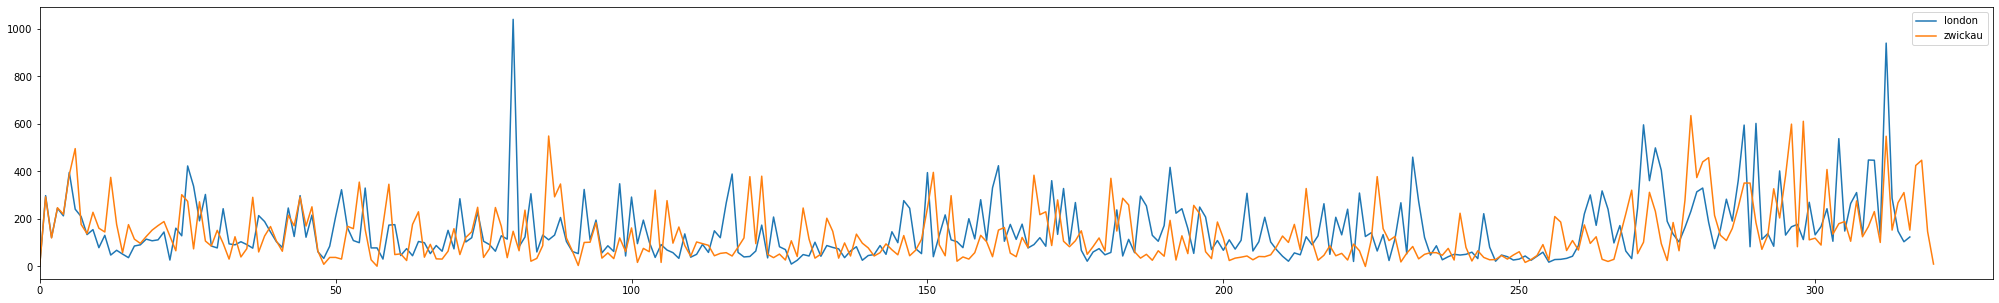

In [21]:
fig, ax = plt.subplots(1, 1, figsize=(35,5))

ax.plot([i[0][1] for i in london_inner_levenshtein_distance], label='london')
ax.plot([i[0][1] for i in zwickau_inner_levenshtein_distance], label='zwickau')
# ax.plot([i[0][1] for i in breslau_inner_levenshtein_distance], label='breslau')


ax.set_xlim([0, 330])
ax.legend()

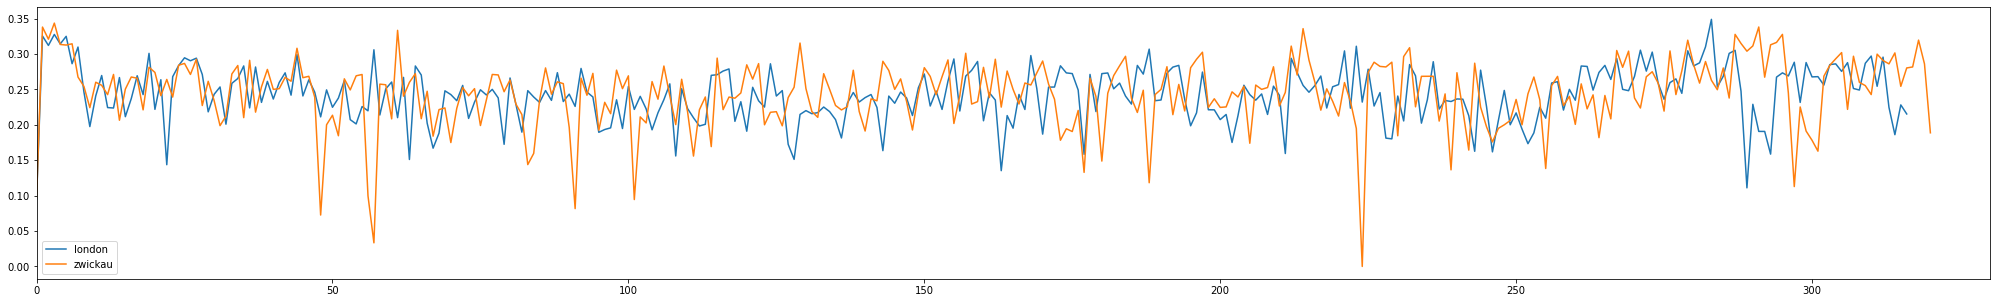

In [38]:
fig, ax = plt.subplots(1, 1, figsize=(35,5))

ax.plot([ p[0][1] / len(london_corpus[i]) for i, p in enumerate(london_inner_levenshtein_distance) ], label='london')
ax.plot([ p[0][1] / len(zwickau_corpus[i]) for i, p in enumerate(zwickau_inner_levenshtein_distance) ], label='zwickau')
# ax.plot([ p[0][1] / len(breslau_corpus[i]) for i, p in enumerate(breslau_inner_levenshtein_distance) ], label='breslau')
# ax.plot([i[0][1] for i in zwickau_inner_levenshtein_distance], label='zwickau')
# ax.plot([i[0][1] for i in breslau_inner_levenshtein_distance], label='breslau')


ax.set_xlim([0, 330])
ax.legend()

In [28]:
london_inner_levenshtein_distance[80]

[(55, 1040)]

In [39]:
len("hello world")

11

In [31]:
# len(thesisDataReader.get_london_by_new_line()[80])
for index, p in enumerate(thesisDataReader.get_london_by_new_line()):
    print(f'{index} - {len(p)}')

0 - 21
1 - 916
2 - 391
3 - 748
4 - 678
5 - 1219
6 - 842
7 - 678
8 - 544
9 - 785
10 - 328
11 - 486
12 - 214
13 - 304
14 - 195
15 - 175
16 - 363
17 - 338
18 - 474
19 - 359
20 - 505
21 - 550
22 - 188
23 - 601
24 - 455
25 - 1436
26 - 1164
27 - 653
28 - 1118
29 - 394
30 - 321
31 - 959
32 - 473
33 - 352
34 - 392
35 - 325
36 - 344
37 - 760
38 - 816
39 - 555
40 - 440
41 - 308
42 - 900
43 - 521
44 - 996
45 - 511
46 - 820
47 - 252
48 - 161
49 - 341
50 - 930
51 - 1359
52 - 621
53 - 526
54 - 497
55 - 1462
56 - 355
57 - 255
58 - 145
59 - 694
60 - 676
61 - 219
62 - 281
63 - 298
64 - 371
65 - 370
66 - 267
67 - 527
68 - 340
69 - 613
70 - 305
71 - 1218
72 - 403
73 - 579
74 - 987
75 - 425
76 - 380
77 - 256
78 - 542
79 - 667
80 - 3909
81 - 363
82 - 654
83 - 1233
84 - 255
85 - 570
86 - 451
87 - 563
88 - 753
89 - 451
90 - 259
91 - 239
92 - 1159
93 - 455
94 - 815
95 - 301
96 - 450
97 - 322
98 - 1479
99 - 226
100 - 1149
101 - 433
102 - 812
103 - 463
104 - 197
105 - 424
106 - 293
107 - 225
108 - 218
109 - 546